In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# tryig to set the target variable as the fatal or non fatal accindents in France metropolitan area
#Step 2/ Pre-processing and feature engineering : Deadline Friday, 14th of July
#Following the observations made in the previous step, you will have to clean your dataset and perform the pre-processing steps.
#If necessary, you will have to transform and/or add features and enrich your dataset.
#The objective at the end of this step is to have a dataset ready to perform in-depth analysis and/or modeling using Machine (and Deep) Learning.

In [22]:
df = pd.read_csv("./data/230816_input_table.csv", index_col=0, low_memory=False)

df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 471872 entries, 201900000001 to 201800049520
Data columns (total 60 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id_vehicule    347617 non-null  float64
 1   num_veh        471872 non-null  object 
 2   place          465592 non-null  float64
 3   catu           471872 non-null  int64  
 4   grav           471872 non-null  int64  
 5   sexe           471872 non-null  int64  
 6   an_nais        468793 non-null  float64
 7   trajet         471783 non-null  float64
 8   secu1          347617 non-null  float64
 9   secu2          347617 non-null  float64
 10  secu3          347617 non-null  float64
 11  locp           469679 non-null  float64
 12  actp           469674 non-null  object 
 13  etatp          469670 non-null  float64
 14  secu           121761 non-null  float64
 15  an             471872 non-null  int64  
 16  mois           471872 non-null  int64  
 17  jour           47

In [23]:
df['an'].describe()

count    471872.000000
mean       2017.494272
std           4.724788
min        2005.000000
25%        2018.000000
50%        2019.000000
75%        2021.000000
max        2021.000000
Name: an, dtype: float64

In [ ]:
# TS: The following code is not necessary. We have only M and NaN, while we cannot impute reliable impute data in the NaNs

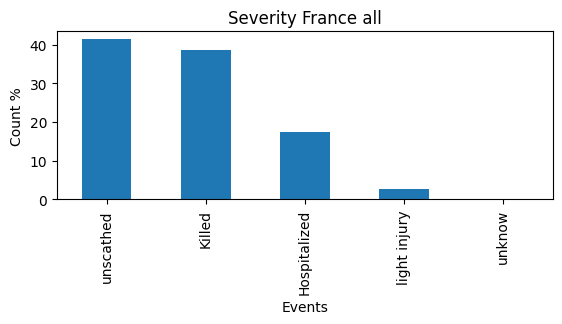

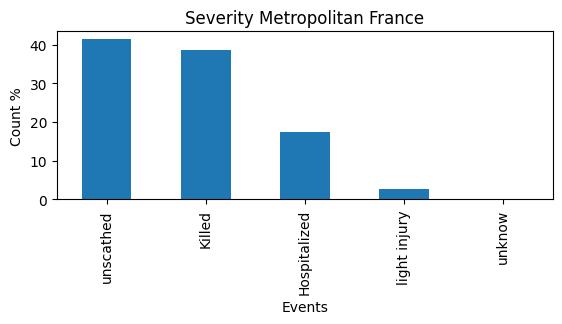

In [5]:
# exploring a possible target variable
#severity
event_counts = df['grav'].value_counts()
event_percentages = (event_counts / event_counts.sum()) * 100
plt.subplot(2,1,1)
event_percentages.plot.bar()
labels = ['unscathed','Killed','Hospitalized','light injury','unknow']
# Add labels and title to the plot
plt.xticks(range(len(event_percentages)), labels)
plt.xlabel('Events')
plt.ylabel('Count %')
plt.title('Severity France all')
# Display the plot
plt.show()



event_counts_M = df['grav'].value_counts()
event_percentages_M = (event_counts_M / event_counts_M.sum()) * 100
plt.subplot(2,1,2)
event_percentages.plot.bar()
#labels = ['unscathed','Killed','Hospitalized','light injury']
labels = ['unscathed','Killed','Hospitalized','light injury','unknow']
# Add labels and title to the plot
plt.xticks(range(len(event_percentages_M)), labels)
plt.xlabel('Events')
plt.ylabel('Count %')
plt.title('Severity Metropolitan France')
# Display the plot
plt.show()


In [24]:
# create a new variable for the severity ['Grav'] of accidents ( fatal, non-fatal) as a possible target variable
# a new binary variable 'fatality' based on 'severity' named fatal
df['fatal'] = np.where(df['grav'].isin([1, 3, 4]), 0, 1)



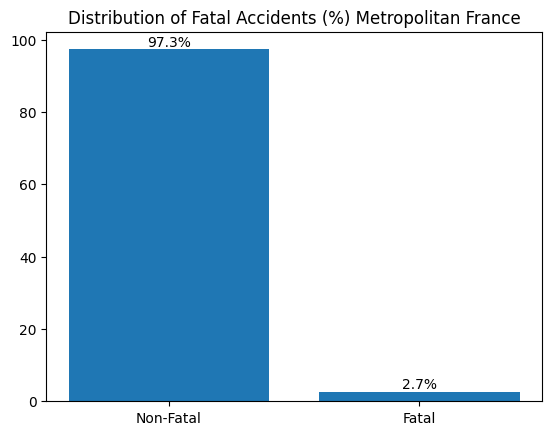

In [25]:
# explorig the new variable 
percentage_distribution = df['fatal'].value_counts(normalize=True) * 100

# Create a bar plot
plt.bar(percentage_distribution.index, percentage_distribution.values)

# Set the x-axis tick labels
plt.xticks(percentage_distribution.index)
plt.xticks(percentage_distribution.index, ['Non-Fatal', 'Fatal'])
plt.title('Distribution of Fatal Accidents (%) Metropolitan France')
# Show labels on top of bars
for i, v in enumerate(percentage_distribution.values):
    plt.text(i, v, f"{v:.1f}%", ha='center', va='bottom')

plt.show()

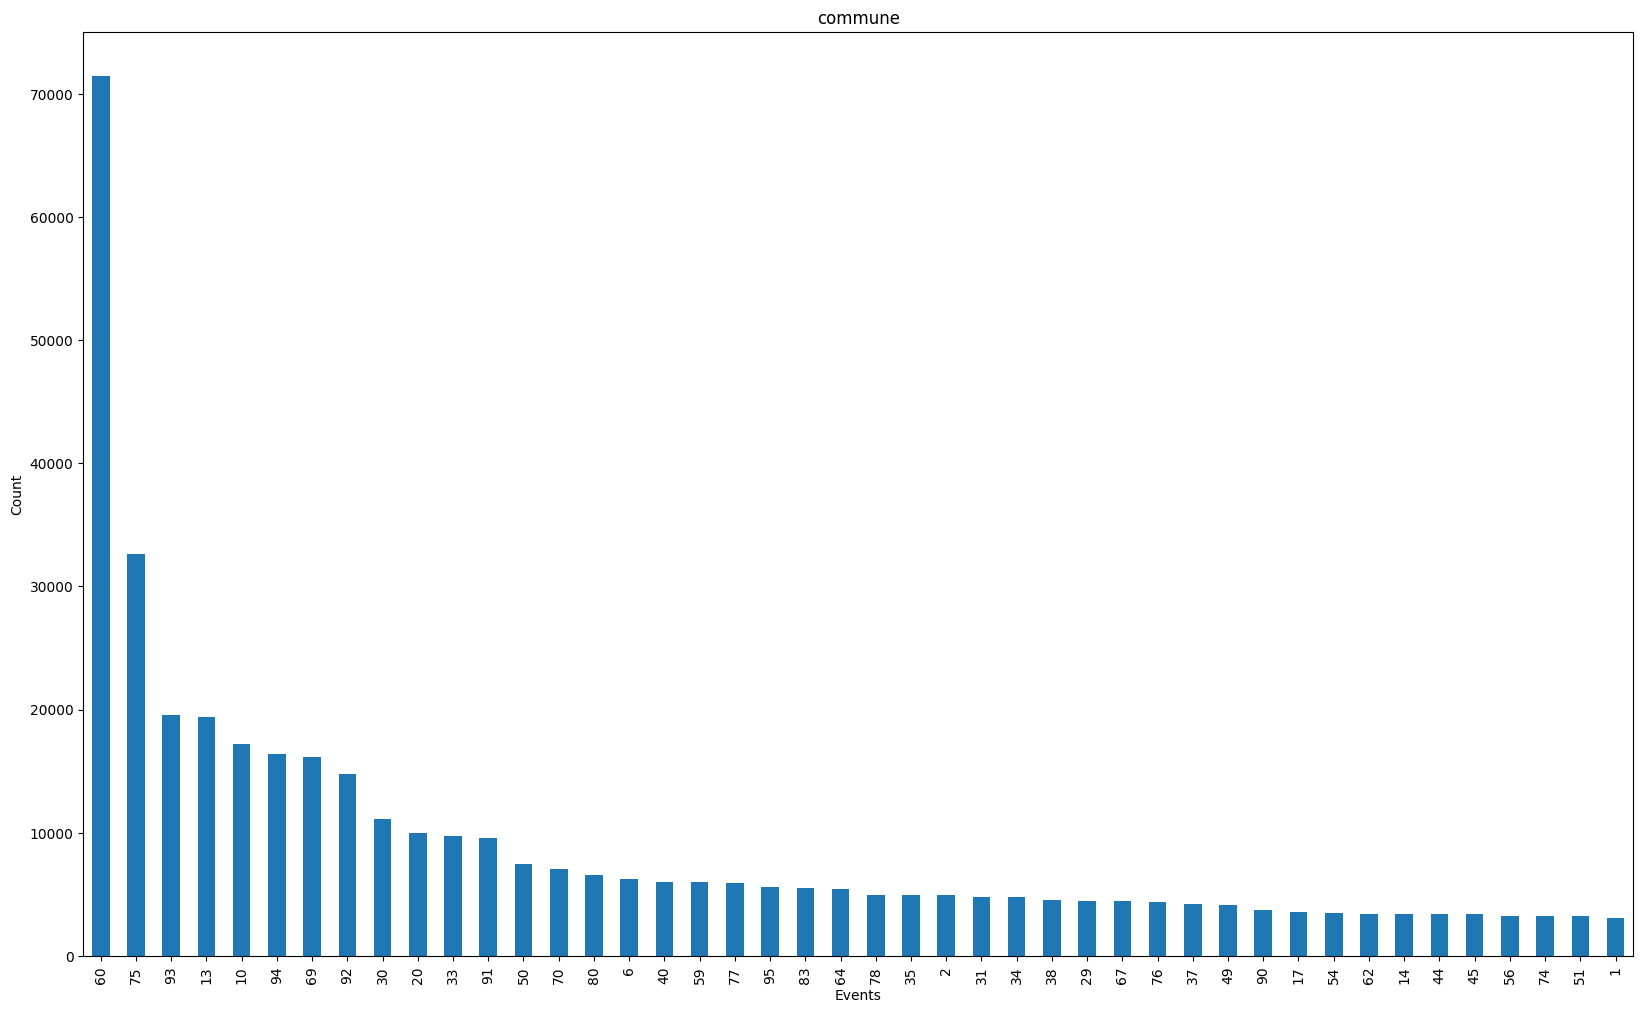

In [8]:
plt.figure(figsize=(20,12))
event_counts = df['dep'].value_counts()
event_counts_filtered = event_counts[event_counts > 3000]

event_counts_filtered.plot.bar()

plt.xticks(rotation=90)
plt.xlabel('Events')
plt.ylabel('Count')
plt.title('commune')
# Display the plot
plt.show()

In [9]:
df['jour'].describe()

count    471872.000000
mean         15.687511
std           8.754994
min           1.000000
25%           8.000000
50%          16.000000
75%          23.000000
max          31.000000
Name: jour, dtype: float64

In [10]:
df.info()
#new



<class 'pandas.core.frame.DataFrame'>
Index: 471872 entries, 201900000001 to 201800049520
Data columns (total 61 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id_vehicule    347617 non-null  float64
 1   num_veh        471872 non-null  object 
 2   place          465592 non-null  float64
 3   catu           471872 non-null  int64  
 4   grav           471872 non-null  int64  
 5   sexe           471872 non-null  int64  
 6   an_nais        468793 non-null  float64
 7   trajet         471783 non-null  float64
 8   secu1          347617 non-null  float64
 9   secu2          347617 non-null  float64
 10  secu3          347617 non-null  float64
 11  locp           469679 non-null  float64
 12  actp           469674 non-null  object 
 13  etatp          469670 non-null  float64
 14  secu           121761 non-null  float64
 15  an             471872 non-null  int64  
 16  mois           471872 non-null  int64  
 17  jour           47

In [11]:
df['date']

Num_Acc
201900000001    2019-11-30
201900000001    2019-11-30
201900000001    2019-11-30
201900000002    2019-11-30
201900000003    2019-11-28
                   ...    
201800049478    2018-10-21
201800049512    2018-12-16
201800049512    2018-12-16
201800049517    2018-12-20
201800049520    2018-12-26
Name: date, Length: 471872, dtype: object

In [16]:
df['year'] = df['an']

In [30]:
df.index

Index([201900000001, 201900000001, 201900000001, 201900000002, 201900000003,
       201900000003, 201900000003, 201900000003, 201900000004, 201900000004,
       ...
       201800049457, 201800049457, 201800049457, 201800049474, 201800049474,
       201800049474, 201800049478, 201800049478, 201800049478, 201800049520],
      dtype='int64', name='Num_Acc', length=416924)

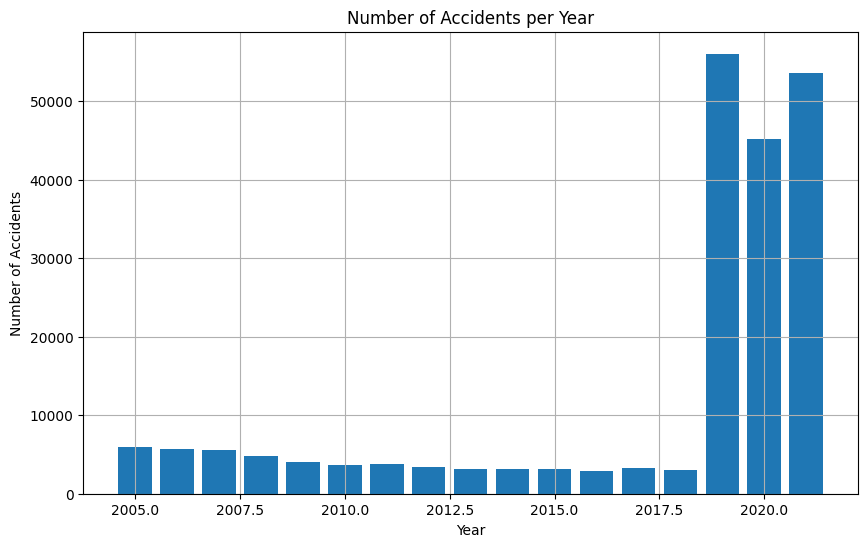

In [17]:
# We need to aggregate the index first
accidents_per_year = pd.DataFrame(df['year'].groupby(df.index).value_counts()).index.get_level_values(1).value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.bar(accidents_per_year.index, accidents_per_year.values)
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents per Year')
plt.grid(True)
plt.show()

In [84]:
accidents_per_year

year
2005     2968
2006     2927
2007     2745
2008     2328
2009     1523
2010     1561
2011     1867
2012     1708
2013     1641
2014     1647
2015     1830
2016     2083
2017     3105
2018     2996
2019    56016
2020    45121
2021    53540
Name: count, dtype: int64

The next cell is a wrong aggregation, because the index is multiple and not unequivocal.

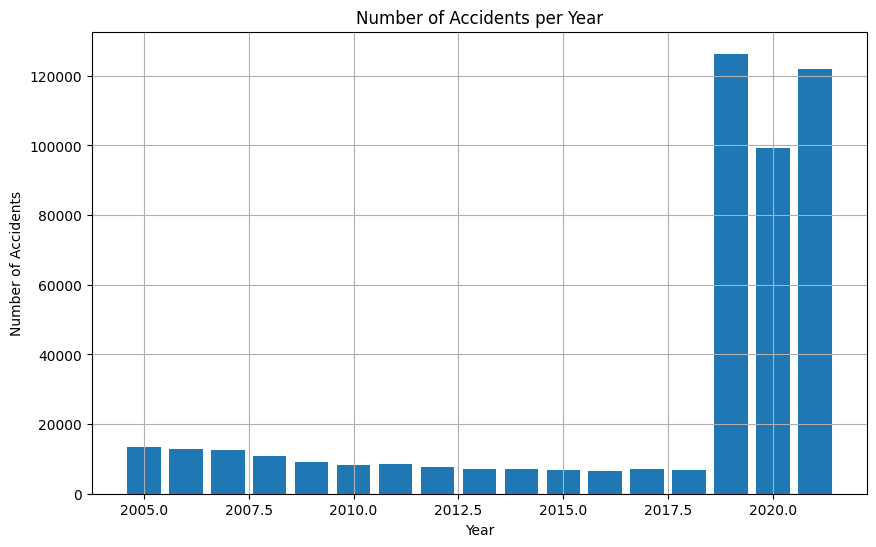

In [18]:
accidents_per_year = df['year'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.bar(accidents_per_year.index, accidents_per_year.values)
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents per Year')
plt.grid(True)
plt.show()

In [86]:
accidents_per_year

year
2005      6676
2006      6777
2007      6126
2008      5221
2009      3413
2010      3464
2011      4122
2012      3794
2013      3752
2014      3610
2015      4047
2016      4740
2017      6799
2018      6766
2019    126352
2020     99169
2021    122096
Name: count, dtype: int64

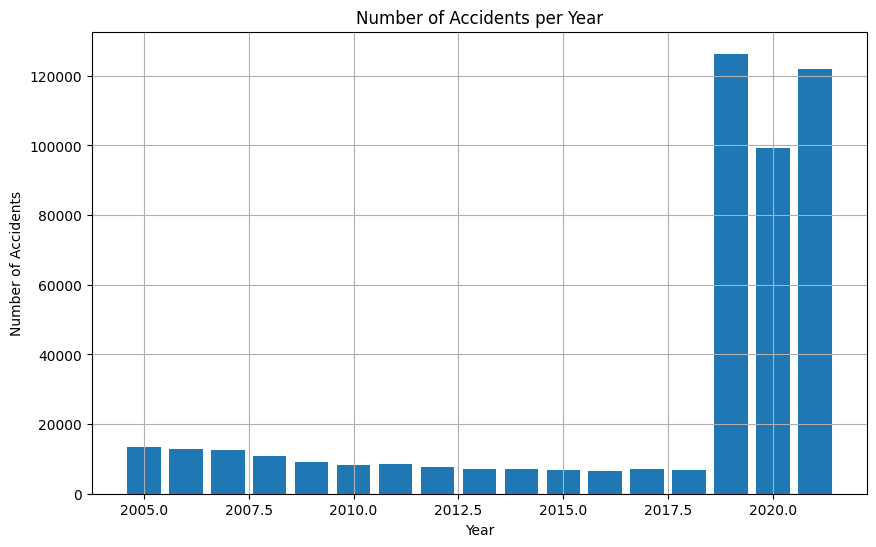

In [19]:
df['year'] = df['date_1'].dt.year # new

# Group the data by year and count the occurrences
accidents_per_year = df['year'].value_counts().sort_index()

# Plot the number of accidents per year
plt.figure(figsize=(10, 6))
plt.bar(accidents_per_year.index, accidents_per_year.values)
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents per Year')
plt.grid(True)
plt.show()

In [31]:
accidents_per_year
# this is strange for 2019,2020 and 2021


2005      6676
2006      6777
2007      6126
2008      5221
2009      3413
2010      3464
2011      4122
2012      3794
2013      3752
2014      3610
2015      4047
2016      4740
2017      6799
2018      6766
2019    126352
2020     99169
2021    122096
Name: year, dtype: int64

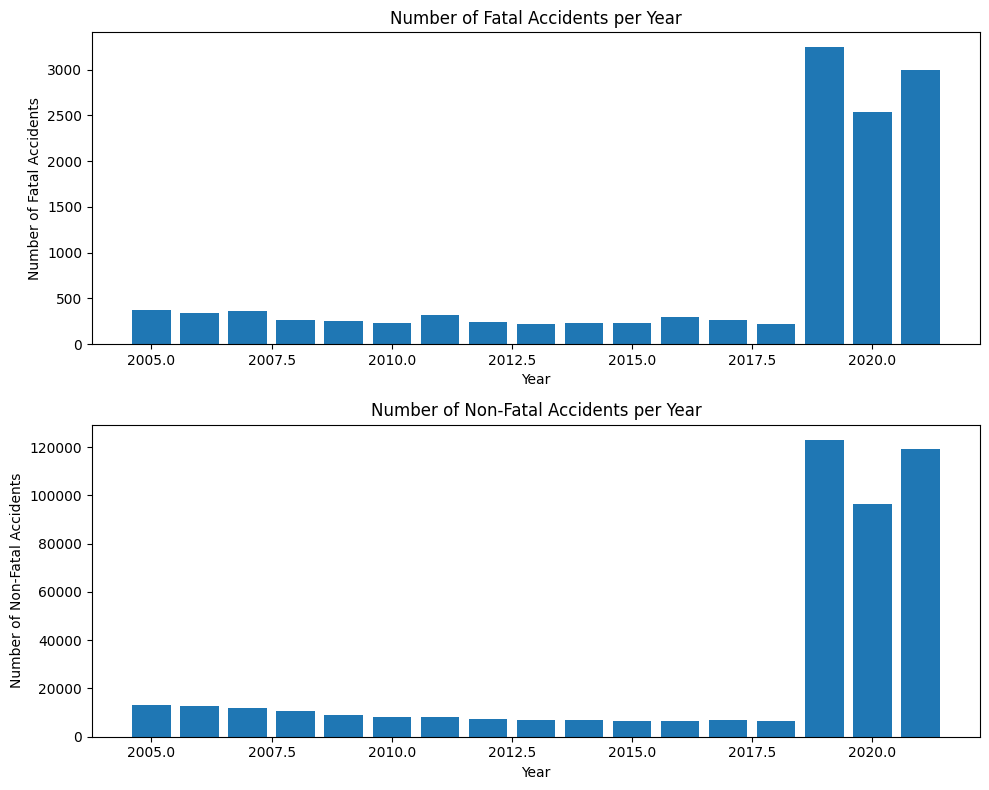

In [20]:
fatal_counts = df[df['fatal'] == 1]['year'].value_counts().sort_index()

# Group the data by year and count the occurrences for non-fatal accidents
non_fatal_counts = df[df['fatal'] == 0]['year'].value_counts().sort_index()

# Create subplots for fatal and non-fatal accidents
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Plot the number of fatal accidents per year
ax1.bar(fatal_counts.index, fatal_counts.values)
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Fatal Accidents')
ax1.set_title('Number of Fatal Accidents per Year')

# Plot the number of non-fatal accidents per year
ax2.bar(non_fatal_counts.index, non_fatal_counts.values)
ax2.set_xlabel('Year')
ax2.set_ylabel('Number of Non-Fatal Accidents')
ax2.set_title('Number of Non-Fatal Accidents per Year')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()



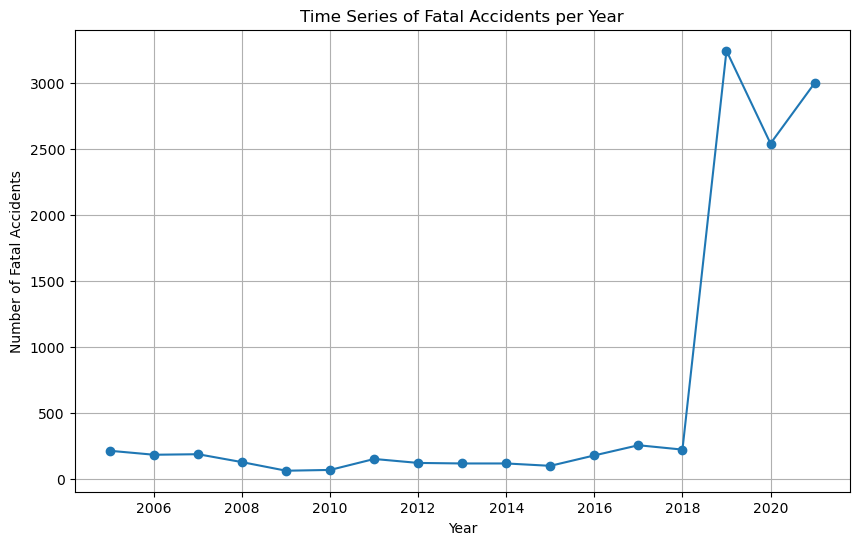

In [22]:
fatal_counts = df[df['fatal'] == 1]['year'].value_counts().sort_index()

# Plot the time series of fatal accidents per year
plt.figure(figsize=(10, 6))
plt.plot(fatal_counts.index, fatal_counts.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Fatal Accidents')
plt.title('Time Series of Fatal Accidents per Year')
plt.grid(True)
plt.show()

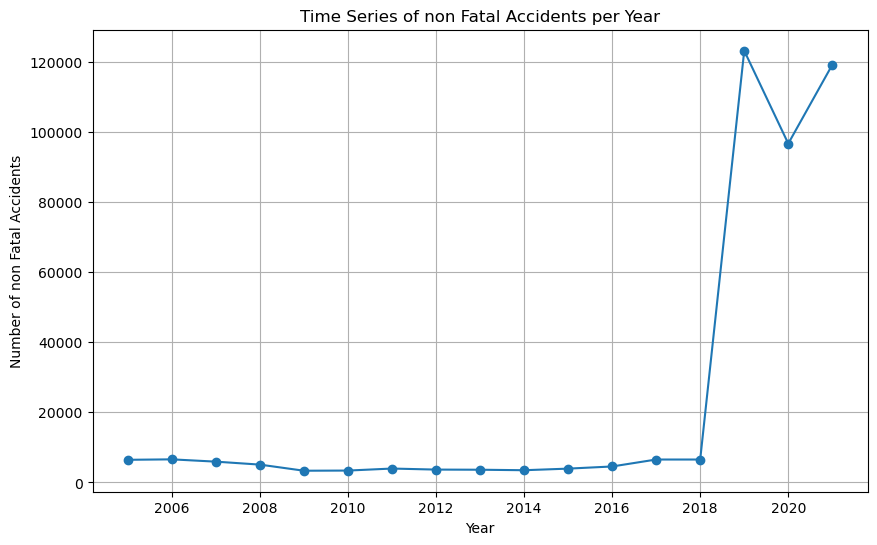

In [23]:
fatal_counts = df[df['fatal'] == 0]['year'].value_counts().sort_index()

# Plot the time series of fatal accidents per year
plt.figure(figsize=(10, 6))
plt.plot(fatal_counts.index, fatal_counts.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Number of non Fatal Accidents')
plt.title('Time Series of non Fatal Accidents per Year')
plt.grid(True)
plt.show()

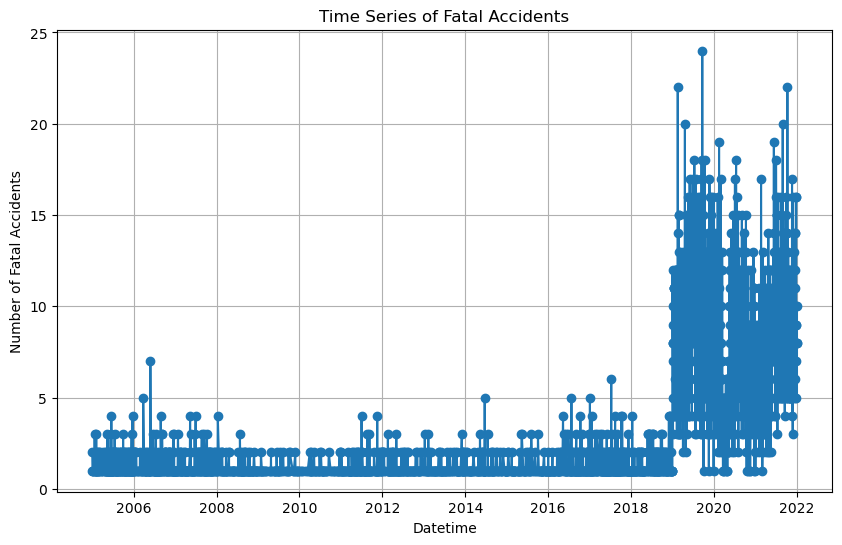

In [25]:
#time series of fatal accidents

fatal_counts = df[df['fatal'] == 1]['date_1'].value_counts().sort_index()

# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(fatal_counts.index, fatal_counts.values, marker='o')
plt.xlabel('Datetime')
plt.ylabel('Number of Fatal Accidents')
plt.title('Time Series of Fatal Accidents')
plt.grid(True)
plt.show()

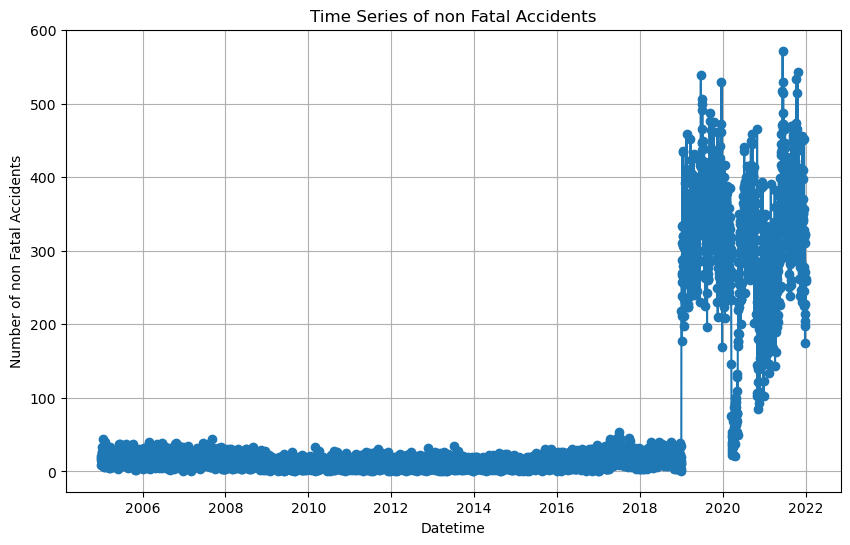

In [27]:
#time series of non fatal accidents
fatal_counts = df[df['fatal'] == 0]['date_1'].value_counts().sort_index()

# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(fatal_counts.index, fatal_counts.values, marker='o')
plt.xlabel('Datetime')
plt.ylabel('Number of non Fatal Accidents')
plt.title('Time Series of non Fatal Accidents')
plt.grid(True)
plt.show()



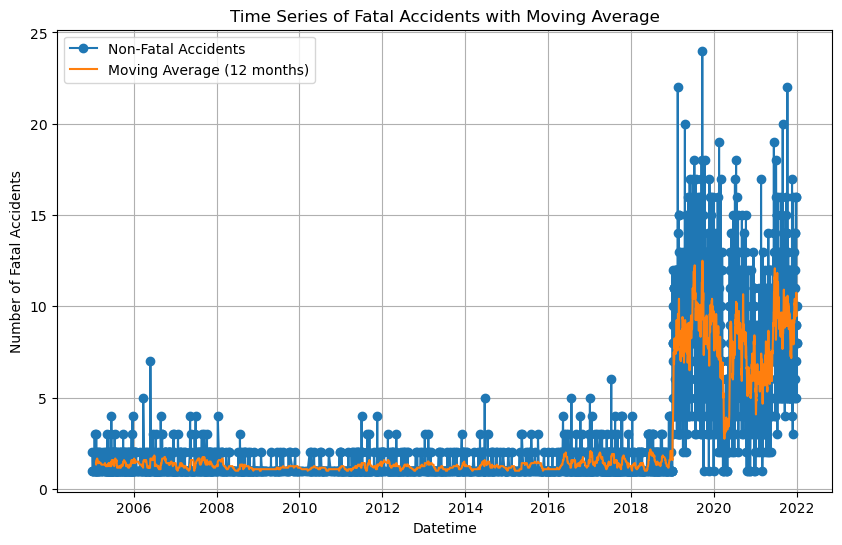

In [28]:
#Filter the DataFrame for fatal accidents
non_fatal_counts = df[df['fatal'] == 1]['date_1'].value_counts().sort_index()

# Calculate the moving average with a window size =  12 months
moving_average = non_fatal_counts.rolling(window=12).mean()

# Plot the time series and the moving average
plt.figure(figsize=(10, 6))
plt.plot(non_fatal_counts.index, non_fatal_counts.values, marker='o', label='Non-Fatal Accidents')
plt.plot(moving_average.index, moving_average.values, label='Moving Average (12 months)')
plt.xlabel('Datetime')
plt.ylabel('Number of Fatal Accidents')
plt.title('Time Series of Fatal Accidents with Moving Average')
plt.grid(True)
plt.legend()
plt.show()

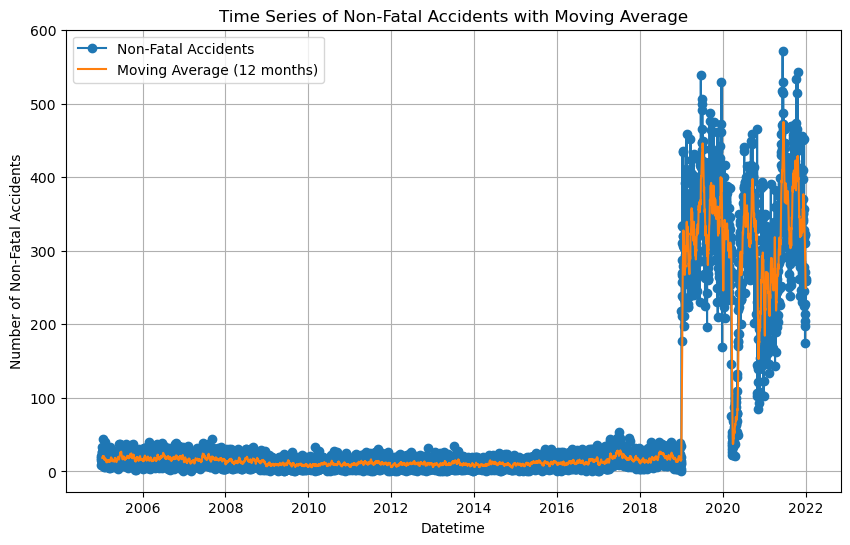

In [29]:
#Filter the DataFrame for non-fatal accidents
non_fatal_counts = df[df['fatal'] == 0]['date_1'].value_counts().sort_index()

# Calculate the moving average with a window size of your choice (e.g., 12 months)
moving_average = non_fatal_counts.rolling(window=12).mean()

# Plot the time series and the moving average
plt.figure(figsize=(10, 6))
plt.plot(non_fatal_counts.index, non_fatal_counts.values, marker='o', label='Non-Fatal Accidents')
plt.plot(moving_average.index, moving_average.values, label='Moving Average (12 months)')
plt.xlabel('Datetime')
plt.ylabel('Number of Non-Fatal Accidents')
plt.title('Time Series of Non-Fatal Accidents with Moving Average')
plt.grid(True)
plt.legend()
plt.show()
# strange increase